In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Demo Pharmacy Sales Data.csv')

In [ ]:
df

,Date Sold,Med_name,Med_class,Quantity Sold,Price
0,2021-05-07,Clotrimazole Topical Cream (2%),Antifungal,66,86.9
1,2021-08-09,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,15,22.9
2,2021-06-15,Methyltestosterone Tablet (10 mg),Androgen Hormone,5,5.9
3,2021-02-19,Buspirone Tablet (5 mg),Anxiolytic,89,55.7
4,2022-09-24,Hydrocodone/Acetaminophen Tablet (5/325 mg),Opioid Analgesic/Analgesic Combination,79,0.7
...,...,...,...,...,...
999995,2020-11-29,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,34,58.0
999996,2021-03-30,Fenoprofen Tablet (600 mg),Nonsteroidal Anti-Inflammatory Drug,12,98.3
999997,2020-04-17,Doxazosin Tablet (1 mg),Alpha-Blocker,83,10.3
999998,2021-12-08,Flumazenil Injection (0.1 mg/mL),Benzodiazepine Antagonist,1,23.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Date Sold      1000000 non-null  object 
 1   Med_name       1000000 non-null  object 
 2   Med_class      1000000 non-null  object 
 3   Quantity Sold  1000000 non-null  int64  
 4   Price          1000000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 38.1+ MB


In [ ]:
df[['Quantity Sold','Price']].describe()

,Quantity Sold,Price
count,1000000.000000,1000000.000000
mean,50.524566,50.024411
std,28.847235,28.872706
min,1.000000,0.100000
25%,26.000000,25.000000
50%,51.000000,50.000000
75%,75.000000,75.100000
max,100.000000,100.000000


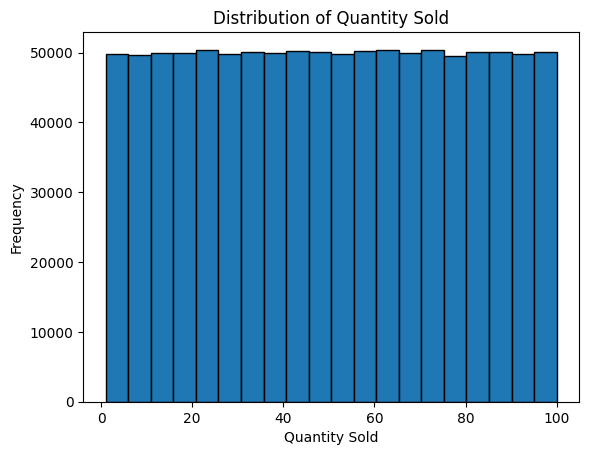

In [ ]:
plt.hist(df['Quantity Sold'],bins=20,edgecolor='black')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity Sold')
plt.show()

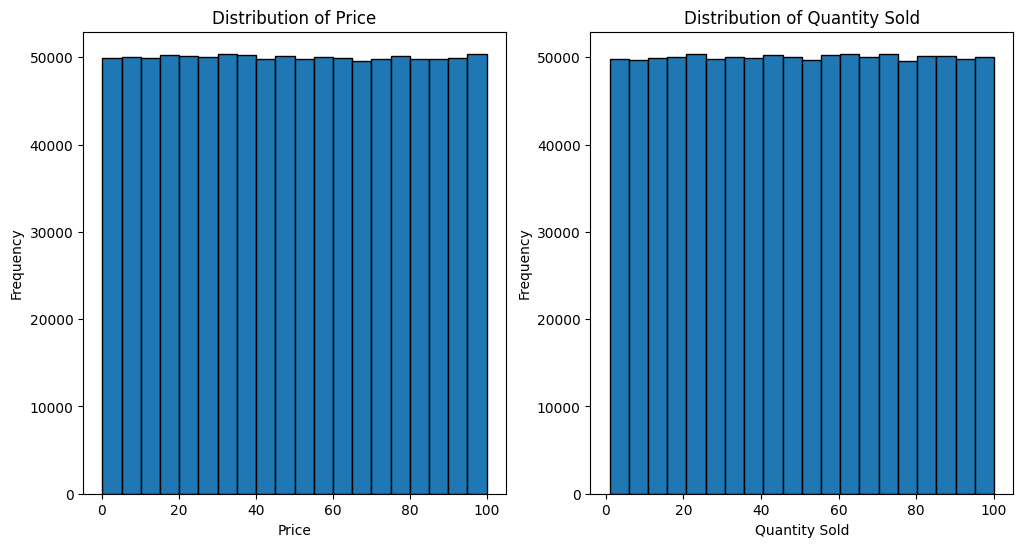

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(df['Price'],bins=20,edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

plt.subplot(1,2,2)
plt.hist(df['Quantity Sold'],bins=20,edgecolor='black')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity Sold')
plt.show()

In [ ]:
largest_med_class=df['Med_class'].value_counts().nlargest(10).index

In [ ]:
largest_med_class

Index([' Nonsteroidal Anti-Inflammatory Drug',
       ' Phosphodiesterase Type 5 Inhibitor', ' Alpha-Blocker',
       ' Anticonvulsant', ' Beta-Blocker', ' Antifungal', ' Corticosteroid',
       ' Benzodiazepine', ' Low-Potency Corticosteroid',
       ' High-Potency Corticosteroid'],
      dtype='object', name='Med_class')

In [ ]:
df_largest_med_class=df[df['Med_class'].isin(largest_med_class)]

In [ ]:
type(df_largest_med_class)

pandas.core.frame.DataFrame

In [ ]:
df_top=df_largest_med_class.groupby('Med_class')['Quantity Sold'].sum().sort_values()

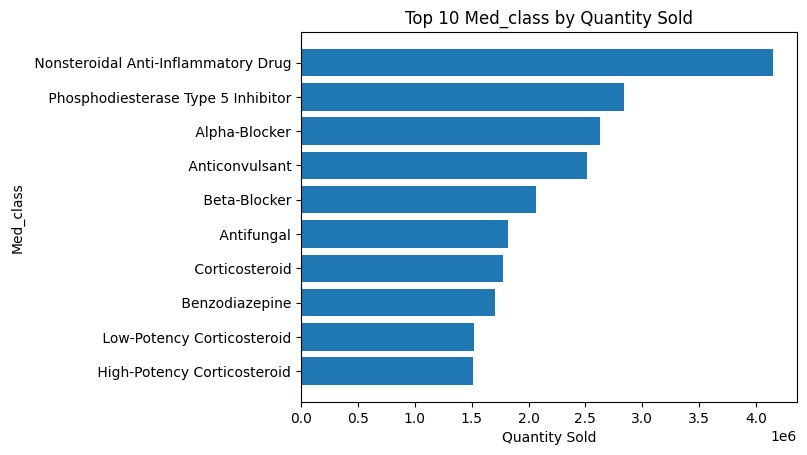

In [ ]:
plt.barh(df_top.index,df_top.values)
plt.xlabel('Quantity Sold')
plt.ylabel('Med_class')
plt.title('Top 10 Med_class by Quantity Sold')
plt.show()

In [ ]:
df

,Date Sold,Med_name,Med_class,Quantity Sold,Price
0,2021-05-07,Clotrimazole Topical Cream (2%),Antifungal,66,86.9
1,2021-08-09,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,15,22.9
2,2021-06-15,Methyltestosterone Tablet (10 mg),Androgen Hormone,5,5.9
3,2021-02-19,Buspirone Tablet (5 mg),Anxiolytic,89,55.7
4,2022-09-24,Hydrocodone/Acetaminophen Tablet (5/325 mg),Opioid Analgesic/Analgesic Combination,79,0.7
...,...,...,...,...,...
999995,2020-11-29,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,34,58.0
999996,2021-03-30,Fenoprofen Tablet (600 mg),Nonsteroidal Anti-Inflammatory Drug,12,98.3
999997,2020-04-17,Doxazosin Tablet (1 mg),Alpha-Blocker,83,10.3
999998,2021-12-08,Flumazenil Injection (0.1 mg/mL),Benzodiazepine Antagonist,1,23.9


In [ ]:
mask=df['Med_class'].str.contains('Anxiolytic')

In [ ]:
df_anxio=df[mask][['Date Sold','Quantity Sold']]

In [ ]:
df_anxio.reset_index(drop=True,inplace=True)

In [ ]:
df_anxio

,Date Sold,Quantity Sold
0,2021-02-19,89
1,2022-03-01,82
2,2020-08-11,17
3,2020-12-08,86
4,2019-03-31,70
...,...,...
9999,2019-08-11,42
10000,2020-05-16,71
10001,2019-09-02,63
10002,2019-09-09,38


In [ ]:
import prophet
from prophet import Prophet

In [ ]:
model=Prophet()

In [ ]:
df_anxio.rename(columns={'Date Sold':'ds','Quantity Sold':'y'},inplace=True)

In [ ]:
type(df_anxio['ds'][0])

str

In [ ]:
df_anxio['ds']=pd.to_datetime(df_anxio['ds'])

In [ ]:
model.fit(df_anxio)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future=model.make_future_dataframe(periods=365)

In [ ]:
forecast=model.predict(future)

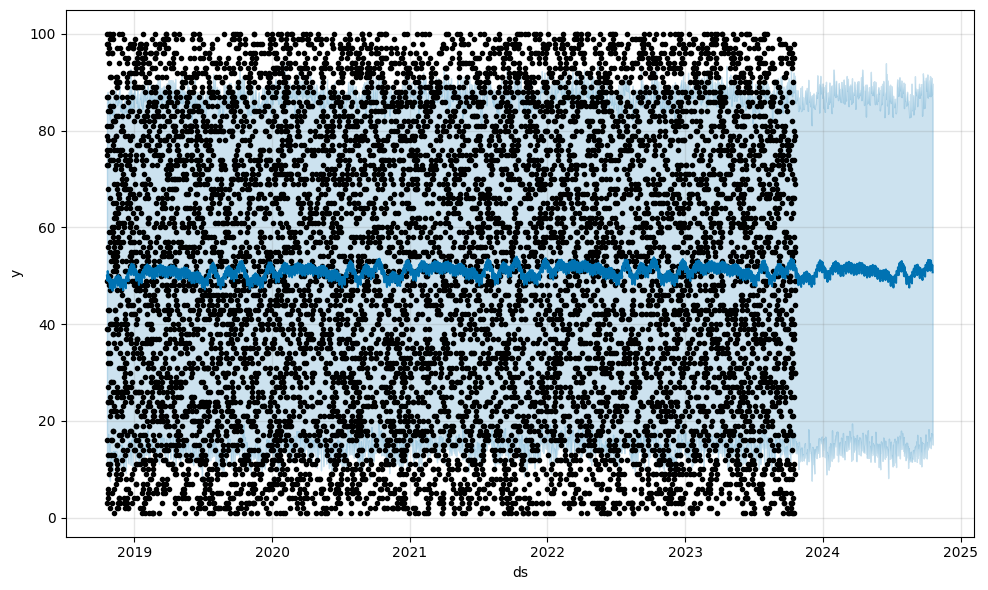

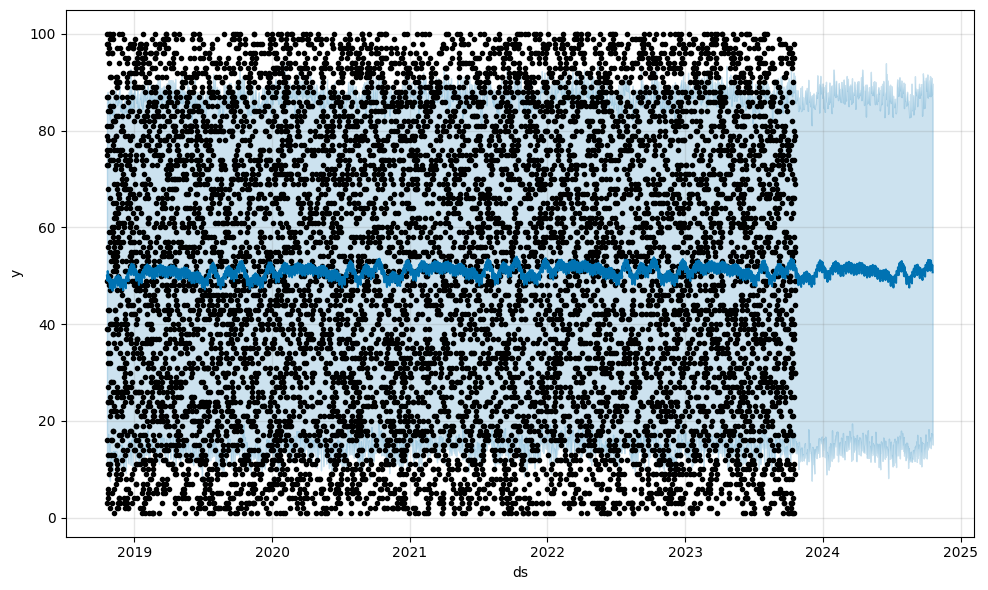

In [ ]:
model.plot(forecast)

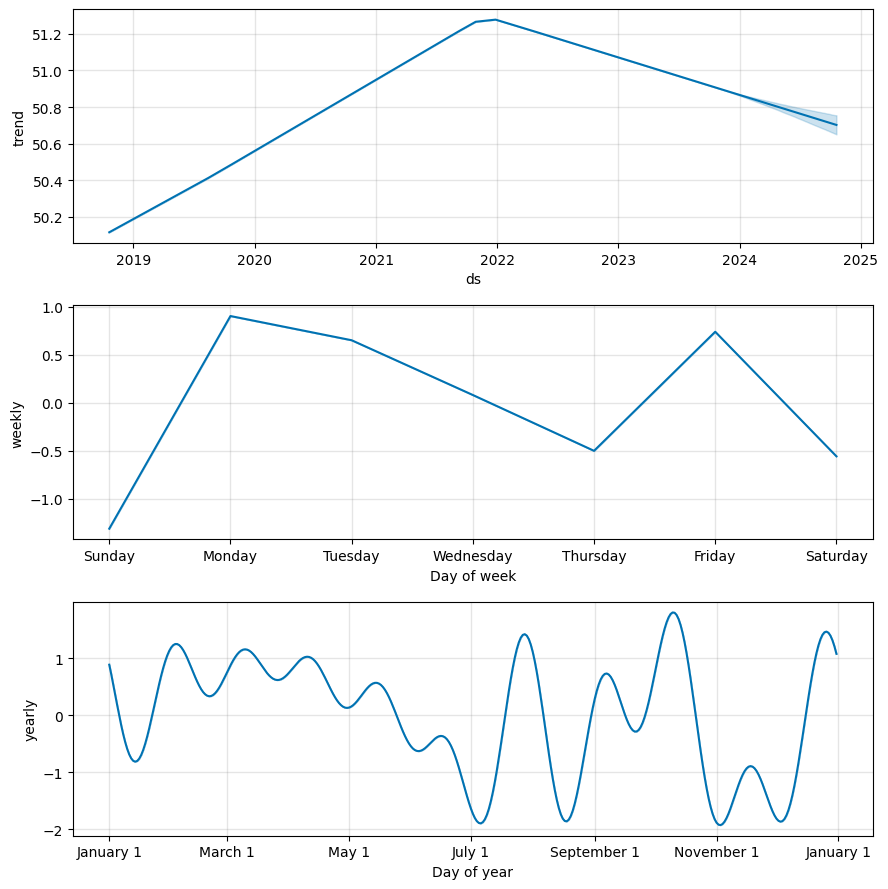

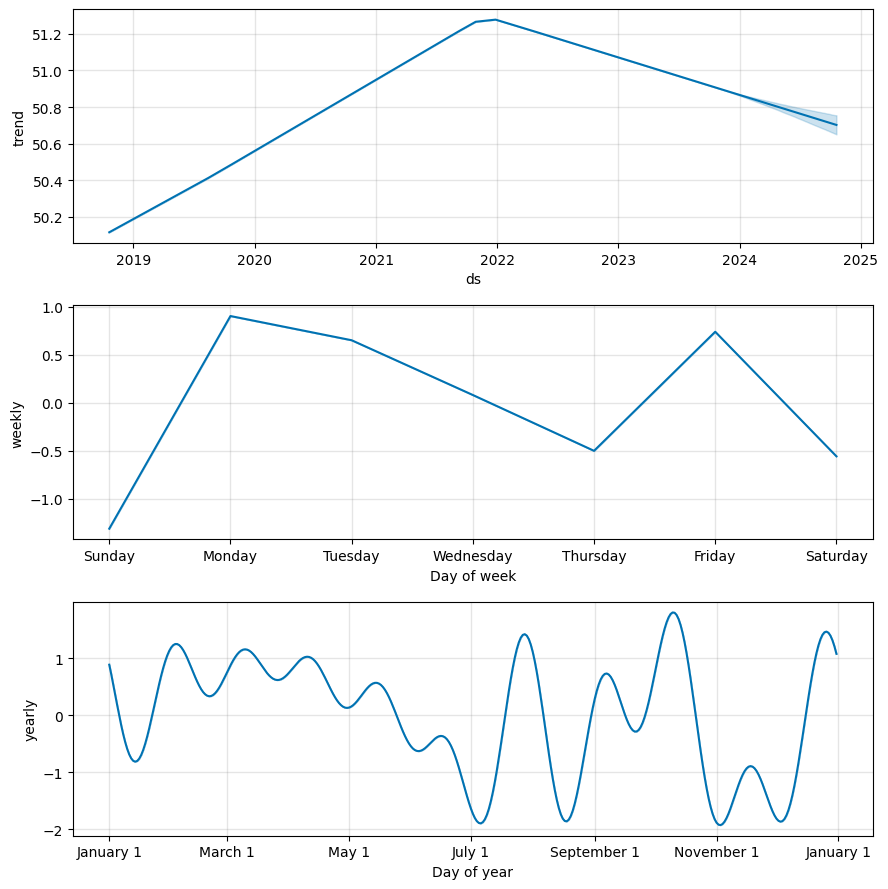

In [ ]:
model.plot_components(forecast)

In [ ]:
def Forecasting_Sales(df,med_class=None,med_name=None):
    if med_class:
        mask=df['Med_class'].str.contains(med_class)
        df=df[mask]
    elif med_name:
        mask=df['Med_name'].str.contains(med_name)
        df=df[mask]
    else:
        return "Please provide med class or med name"
    df.reset_index(drop=True,inplace=True)
    df.rename(columns={'Date Sold':'ds','Quantity Sold':'y'},inplace=True)
    model=Prophet()
    model.fit(df)
    future=model.make_future_dataframe(periods=365)
    forecast=model.predict(future)
    fig1=model.plot(forecast)
    fig2=model.plot_components(forecast)
    return fig1,fig2


/tmp/ipython-input-1094489414.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date Sold':'ds','Quantity Sold':'y'},inplace=True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(<Figure size 1000x600 with 1 Axes>, <Figure size 900x900 with 3 Axes>)

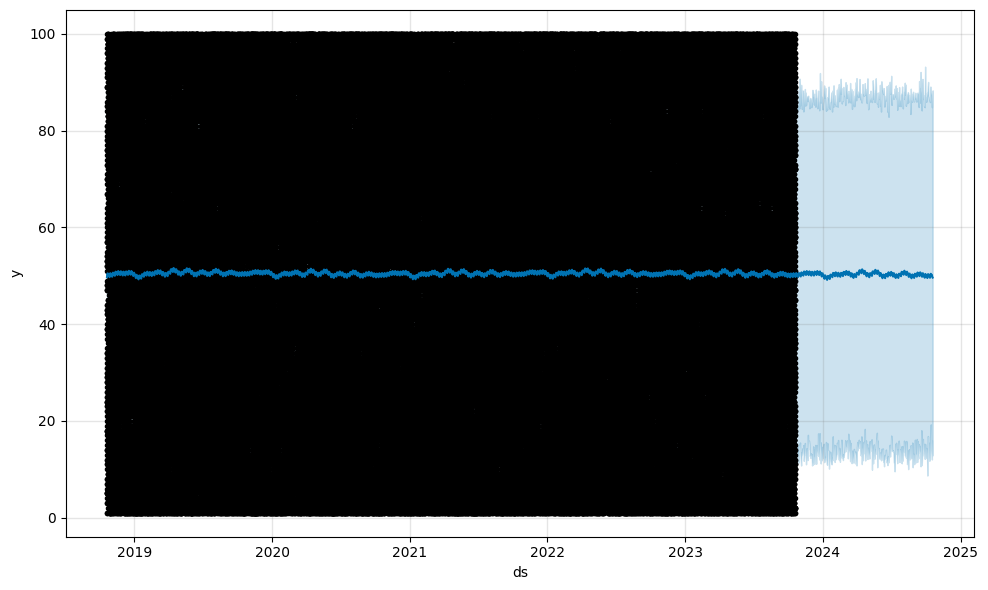

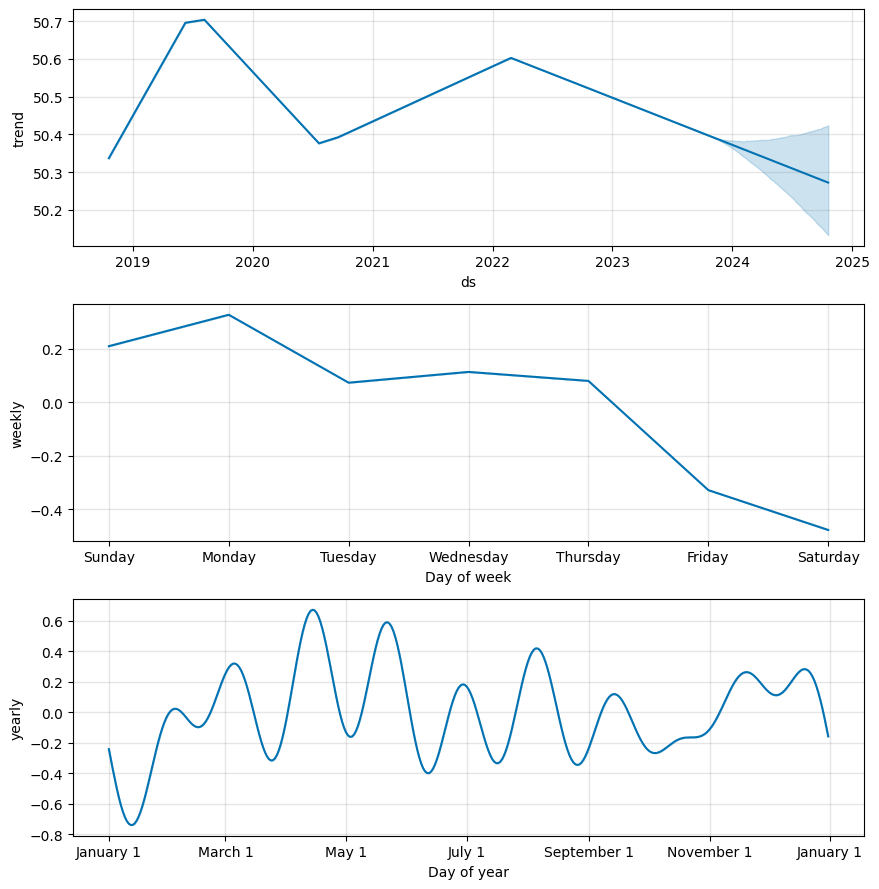

In [ ]:
Forecasting_Sales(df,med_class='Corticosteroid')